In [16]:
!pip install underthesea
!pip install torch
!pip install scikit-learn

   ---------------------------------------- 0.0/20.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/20.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/20.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/20.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/20.9 MB ? eta -:--:--
    --------------------------------------- 0.3/20.9 MB ? eta -:--:--
    --------------------------------------- 0.3/20.9 MB ? eta -:--:--
    --------------------------------------- 0.3/20.9 MB ? eta -:--:--
    --------------------------------------- 0.3/20.9 MB ? eta -:--:--
    --------------------------------------- 0.3/20.9 MB ? eta -:--:--
   - -------------------------------------- 0.5/20.9 MB 250.4 kB/s eta 0:01:22
   - -------------------------------------- 0.5/20.9 MB 250.4 kB/s eta 0:01:22
   - -------------------------------------- 0.5/20.9 MB 250.4 kB/s eta 0:01:22
   - -------------------------------------- 0.5/20.9 MB 250.4 k

In [2]:
import zipfile
import pandas as pd


zip_path = "data - data.csv.zip"

with zipfile.ZipFile(zip_path, "r") as zip_ref:
    csv_filename = [f for f in zip_ref.namelist() if f.endswith('.csv')][0]
    
    with zip_ref.open(csv_filename) as csv_file:
        df = pd.read_csv(csv_file)
X =  df.pop("Unnamed: 3").head()

## Trực quan dữ liệu:

In [3]:
df.head(5)

,comment,label,rate
0,Áo bao đẹp ạ!!,POS,5
1,Tuyệt vời !,POS,5
2,2day ao khong giong trong.,NEG,1
3,"Mùi thơm,bôi lên da mềm da.",POS,5
4,"Vải đẹp, dày dặn.",POS,5


In [4]:
df.describe()

,rate
count,31460.000000
mean,3.736840
std,1.382483
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31460 entries, 0 to 31459
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  31460 non-null  object
 1   label    31460 non-null  object
 2   rate     31460 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 737.5+ KB


['POS' 'NEG' 'NEU']
label
POS    20093
NEG     6669
NEU     4698
Name: count, dtype: int64


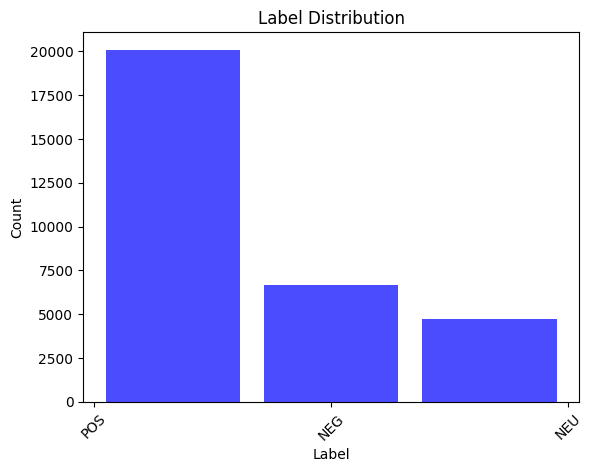

In [9]:
import matplotlib.pyplot as plt
print(df['label'].unique())
print(df['label'].value_counts())
plt.hist(df['label'], bins=len(df['label'].unique()), color='blue', alpha=0.7, rwidth=0.85)
plt.xticks(rotation=45)
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

## Tiền Xử lý dữ liệu
- Tiền xử lý dữ liệu ở đây em sẽ tiến hành các bước như sau:
    - Loại bỏ các số.
    - Loại bỏ các số.
    - Loại bỏ các dấu câu.
    - Loại bỏ khoảng trắng thừa.
    - Bỏ bớt các chữ cái giống nhau liên tiếp (aaaaa -> a).
    - Tách từ tiếng việt sử dụng thư viện underthesea có sẵn.
    - Chuẩn hóa dữ liệu.

- Nói một chút về 1 điểm trong bước này:
    - Thư viện underthesea dùng để làm gì? tại sao không tách bằng split lại thực hiện tách bằng under: `underthesea` có vai trò rất quan trọng trong bước tiền xử lý văn bản `Tiếng Việt`: khi tách từ bằng `underthesea` giúp tách thành các cụm từ có nghĩa (ví dụ: "học sinh giỏi" thành ["học sinh", "giỏi"] nghĩa là một từ được xem là hoàn chỉnh là từ "học sinh") đây là bước cực kỳ quan trong vì tiếng việt không có khoảng trắng rõ ràng giữa các từ như tiếng anh.

In [ ]:
from underthesea import word_tokenize


# Đưa về kiểu chữ thường
def text_lower(text):
    return text.lower()
# Loại bỏ các con số
def remove_numbers(text):
    return ''.join([i for i in text if not i.isdigit()])
# Loại bỏ các dấu câu
def remove_punctuation(text):
    text = text.replace(",", " ").replace(".", " ") \
    .replace(";", " ").replace("“", " ") \
    .replace(":", " ").replace("”", " ") \
    .replace('"', " ").replace("'", " ") \
    .replace("!", " ").replace("?", " ") \
    .replace("-", " ").replace("?", " ")
    return text
# Loại bỏ khoảng trắng thừa
def remove_extra_whitespace(text):
    return ' '.join(text.split())
# Loại bỏ các chữ cái giống nhau liên tiếp
def remove_repeated_characters(text):
    return ''.join([text[i] for i in range(len(text)) if i == 0 or text[i] != text[i-1]])
# Loại bỏ các ký tự đặc biệt
def remove_special_characters(text):
    return ''.join([i for i in text if i.isalnum() or i.isspace()])
# Tách từ tiếng việt sử dụng thư viện underthesea
def VN_tokenize(text):
    return word_tokenize(text)


stopwords trong phần này là gì?: đó là những từ xuất hiện rất nhiều trong các bài viết, các đoạn text nhưng lại không hề liên quan đế nội dung và ý nghĩa của bài viết, gây mơ hồ, làm quá trình máy tính học, phân loại bị giảm độ chính xác. file `vietnamese-stopwords-dash.txt` chứa một list những từ stopwords Tiếng việt của tác giả Lê Văn Duyệt được chúng em tinh chỉnh lại một ít để phù hợp với đồ án.

In [38]:
file_stopwords = pd.read_csv("vietnamese-stopwords-dash.txt")
stopword = []
for i in file_stopwords['stopwords']:
    stopword.append(i)

def remove_VN_stopwords(text):
    text_tokenize = word_tokenize(text)
    return [token for token in text_tokenize if text_lower(token.replace(" ","_")) not in stopword]

Trong lúc thu thập dữ liệu em sẽ xử lý các teencode, viết tắt về nghĩa tương đương của chúng và danh sách này được lưu trong file `teencode-mean.py`:

['chào dạo', 'khẻo', 'không', 'ren']